In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-LA-Project/Mar424_converted_77_Features')
# print(crime_df.shape)

(2883802, 77)


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
crime_df=pd.read_csv("Mar424_converted_77_Features", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [3]:
# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])

In [4]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

In [6]:
# Selecting predictor and target variables

X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Logistic Regression- Full: lr_full

In [9]:
# Training the model and predicting- LR-Full data

logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.727941036235113
Confusion Matrix:
[[134159   1441     26   5221      1    495   2187      1]
 [    57  21900     82      1      6    165  19348     29]
 [  7975   2904    171    176      6  23465   8000     25]
 [ 16469    196      3   8608      0    624    442      2]
 [  5197   3082     36    461      0    270   4252     26]
 [  6674   1975   1247   2441      1 220907   3275      7]
 [  4248  15048     55     67      5    878  34043     36]
 [   888   5794     34      0      2      0  11567     60]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.76      0.93      0.84    143531
        Fraud and Financial Crimes       0.42      0.53      0.47     41588
              Miscellaneous Crimes       0.10      0.00      0.01     42722
             Robbery and Extortion       0.51      0.33      0.40     26344
                   Sexual Offenses       0.00      0.00 

In [13]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
10                              Weapon_Reported    2.293378
33                   Region_Ethnic_Origin_Black    0.285362
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.236134
11                                   Vict_Sex_M    0.160050
1                                      Vict_Age    0.125827
5                                  Avg_Dewpoint    0.056178
54                                     Month_12    0.054999
4                                      Avg_Temp    0.052566
37                   Region_Ethnic_Origin_White    0.051972
67                                    Year_2023    0.051936
43                                Day_of_Week_6    0.049509
61                                    Year_2017    0.048761
47                                      Month_5    0.046992
45                                      Month_3    0.046599
44                                      Month_2    0.040273
53                 

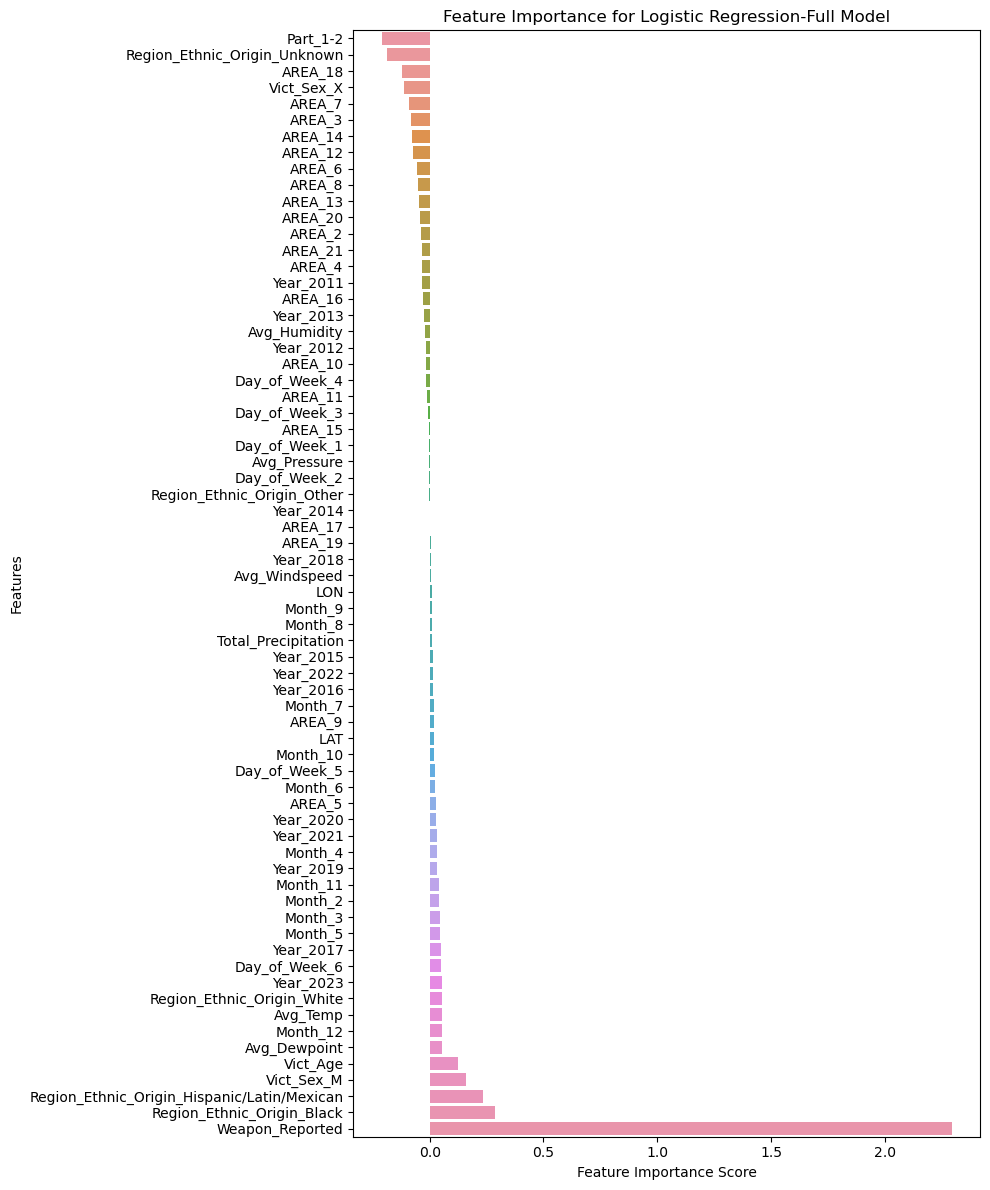

In [14]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression-Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

#

## Model XGBOOST -Full: xgboost_full

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")

XGBoost
Accuracy: 0.7490260263783439
Confusion Matrix:
[[132165   1284   1172   4904    650   1078   2271      7]
 [    51  23425    391      5    102    195  17266    153]
 [  5877   2475   3810    216    624  23574   5983    163]
 [ 14294    207     23  10152    342    946    375      5]
 [  3855   2705    490    471   2136    316   3308     43]
 [  4597   1991     27   2600    167 224020   3073     52]
 [  3679  13445    580     76     70    914  35251    365]
 [   853   5130    288      4     92     21  10907   1050]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.80      0.92      0.86    143531
        Fraud and Financial Crimes       0.46      0.56      0.51     41588
              Miscellaneous Crimes       0.56      0.09      0.15     42722
             Robbery and Extortion       0.55      0.39      0.45     26344
                   Sexual Offenses       0.51      0.16      0.24  

In [16]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
0                                      Part_1-2    0.417142
10                              Weapon_Reported    0.395878
35                   Region_Ethnic_Origin_Other    0.021702
12                                   Vict_Sex_X    0.016466
25                                      AREA_14    0.012989
11                                   Vict_Sex_M    0.009790
1                                      Vict_Age    0.007600
36                 Region_Ethnic_Origin_Unknown    0.007489
33                   Region_Ethnic_Origin_Black    0.006427
16                                       AREA_5    0.006137
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.005532
43                                Day_of_Week_6    0.004690
63                                    Year_2019    0.004276
67                                    Year_2023    0.004015
65                                    Year_2021    0.003395
18                 

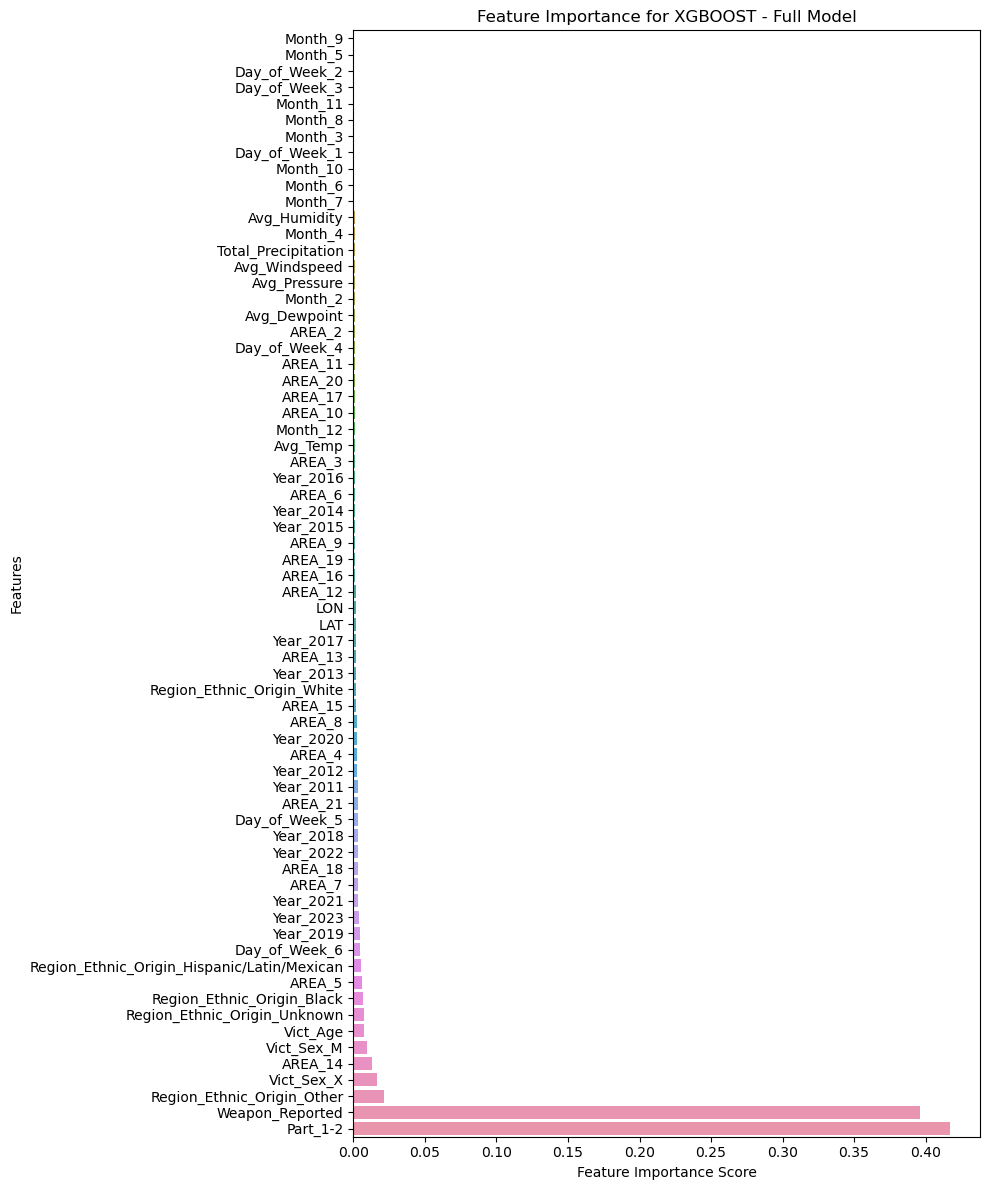

In [18]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

## Model Random Forest -Full: rf_full

In [19]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.7876208689561187
Confusion Matrix:
[[133909   1093    718   4532    436    973   1757    113]
 [   154  25987    506      9    249    295  13511    877]
 [  4806   2028  11754    178    368  19120   4136    332]
 [ 11696    166     36  12944    237    989    265     11]
 [  3293   2025    619    531   3865    342   2433    216]
 [  3643   1679   1834   2014    130 224684   2417    126]
 [  3186  11611    906     71    240    865  35918   1583]
 [   801   4112    425      2    157     93   7547   5208]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.83      0.93      0.88    143531
        Fraud and Financial Crimes       0.53      0.62      0.58     41588
              Miscellaneous Crimes       0.70      0.28      0.39     42722
             Robbery and Extortion       0.64      0.49      0.56     26344
                   Sexual Offenses       0.

In [20]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
10                              Weapon_Reported    0.230072
0                                      Part_1-2    0.202412
2                                           LAT    0.066993
3                                           LON    0.066799
1                                      Vict_Age    0.065856
6                                  Avg_Humidity    0.040843
4                                      Avg_Temp    0.040401
5                                  Avg_Dewpoint    0.040141
7                                 Avg_Windspeed    0.038957
8                                  Avg_Pressure    0.018686
12                                   Vict_Sex_X    0.012738
35                   Region_Ethnic_Origin_Other    0.008537
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.006899
11                                   Vict_Sex_M    0.006711
39                                Day_of_Week_2    0.005445
40                 

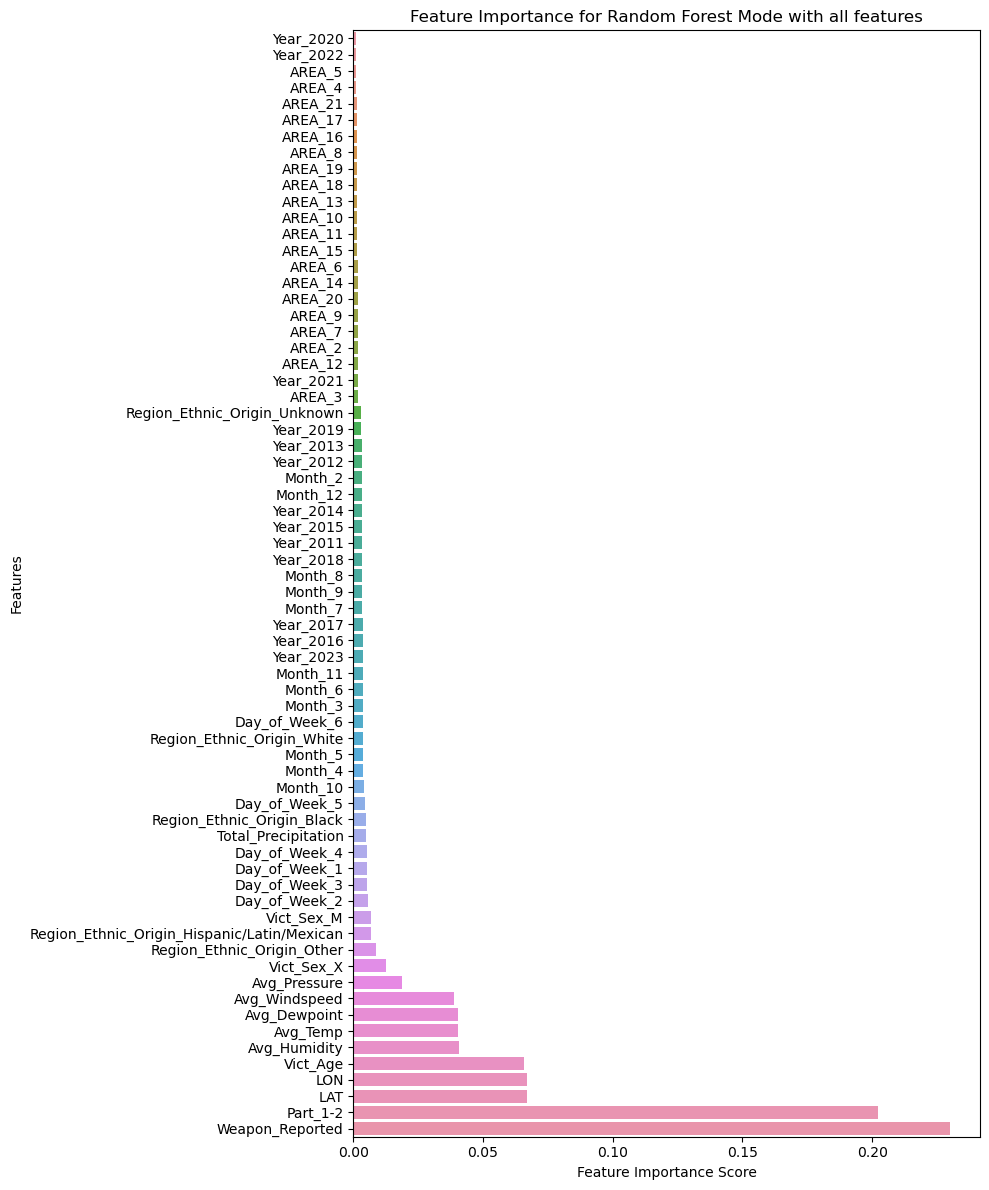

In [21]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Mode with all features')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

## Model KNN7 -Full: knn_full

In [22]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.6557603582766518
Confusion Matrix:
[[123549   2563   1232   3534    343  10006   2080    224]
 [  5422  16538   1343     43    573  10088   6699    882]
 [  8412   2793   2964    284    253  25290   2375    351]
 [ 14272    207    218   4390     96   6923    207     31]
 [  5460   2096    436    257    668   2877   1302    228]
 [  9554   3375   4244   1541    300 215051   2139    323]
 [ 10793  10309   2070    151    635  15542  13447   1433]
 [  3600   3772    722     42    257   4848   3494   1610]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.68      0.86      0.76    143531
        Fraud and Financial Crimes       0.40      0.40      0.40     41588
              Miscellaneous Crimes       0.22      0.07      0.11     42722
             Robbery and Extortion       0.43      0.17      0.24     26344
                   Sexual Offenses       0.21      0.05      0.08     1

In [23]:
# Take too long?

# from sklearn.inspection import permutation_importance

# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [24]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (2883802, 68)
Index(['Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Avg_Temp', 'Avg_Dewpoint',
       'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X', 'AREA_2', 'AREA_3',
       'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10',
       'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16',
       'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
      